In [5]:
# automatically apply changes in netgen
%load_ext autoreload
%autoreload 2

In [1540]:
from time import sleep
import math
import random
# allows performing command-line operations from within Python
from subprocess import call, Popen

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

# import the netgen
import netgen as ng

In [1587]:
ng.setDirectory("continuous010")

In [1588]:
t           = 0
stim        = 2.52 # 2.9 #
preset_dict = [{'cxd': {'dest': [0, 1], 'mult': [1, 1], 'src': [0, 1]}, #[1.0325, 0.96]
             'cxi': {'dest': [0, 1], 'mult': [1.0, 1.0], 'src': [0, 1]}}]

Choices     =    2
BaseStim    =    [0.00]
Dynamic     =    [20.0]
Start       =    200
popscale    =    0.3

GPiExtEff   =   5.925
STNExtEff   =   1.59
STNExtFreq  =   4.45

CxSTR      =    0.25
CxTh       =    0.015
CxFSI      =    0.2
ThSTR      =    0.2
ThCx       =    0.01

sweepcount = ng.configureSweep(0, experiment='mc', preset=preset_dict,
                                Start=Start, popscale=popscale,
                                BaseStim=BaseStim,
                                WrongStim=stim, RightStim=stim,
                                Dynamic=Dynamic,  Choices=Choices,
                                CxSTR=CxSTR, GPiExtEff=GPiExtEff,
                                STNExtEff=STNExtEff, STNExtFreq=STNExtFreq,
                                CxFSI=CxFSI, CxTh=CxTh, ThSTR=ThSTR,
                                ThCx=ThCx, rampingCTX=True)
sweepcount

1

In [1318]:
ng.compileOnly(1,0,sweepcount)

In [1589]:
ng.compileAndRunSweep(8,0,sweepcount)

In [1590]:
results = ng.readAllTrialResults(8,0,sweepcount,['popfreqs','popweights','popQ1s','popQ2s','dopamine'])

(0, 100)

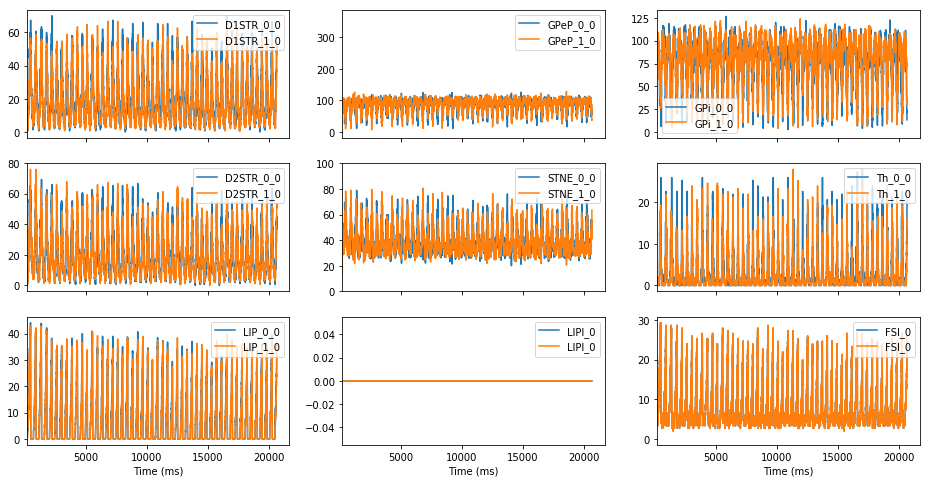

In [1591]:
result = results[0][0]

f, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(16,8), sharex=True)
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPeP_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='GPi_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax3[0])
    result['popfreqs'].plot(x='Time (ms)', y='LIPI_0', ax=ax3[1])
    result['popfreqs'].plot(x='Time (ms)', y='FSI'+'_0', ax=ax3[2])

for ax, axx, axxx in zip(ax1, ax2, ax3):
    ax.set_xlim(200, ax.get_xlim()[-1])#(750,900)#
    axx.set_xlim(200, axx.get_xlim()[-1])#(750,900)#
    axxx.set_xlim(200, axxx.get_xlim()[-1])#(750,900)#

ax2[1].set_ylim(0,100)

(200, 21661.064453125)

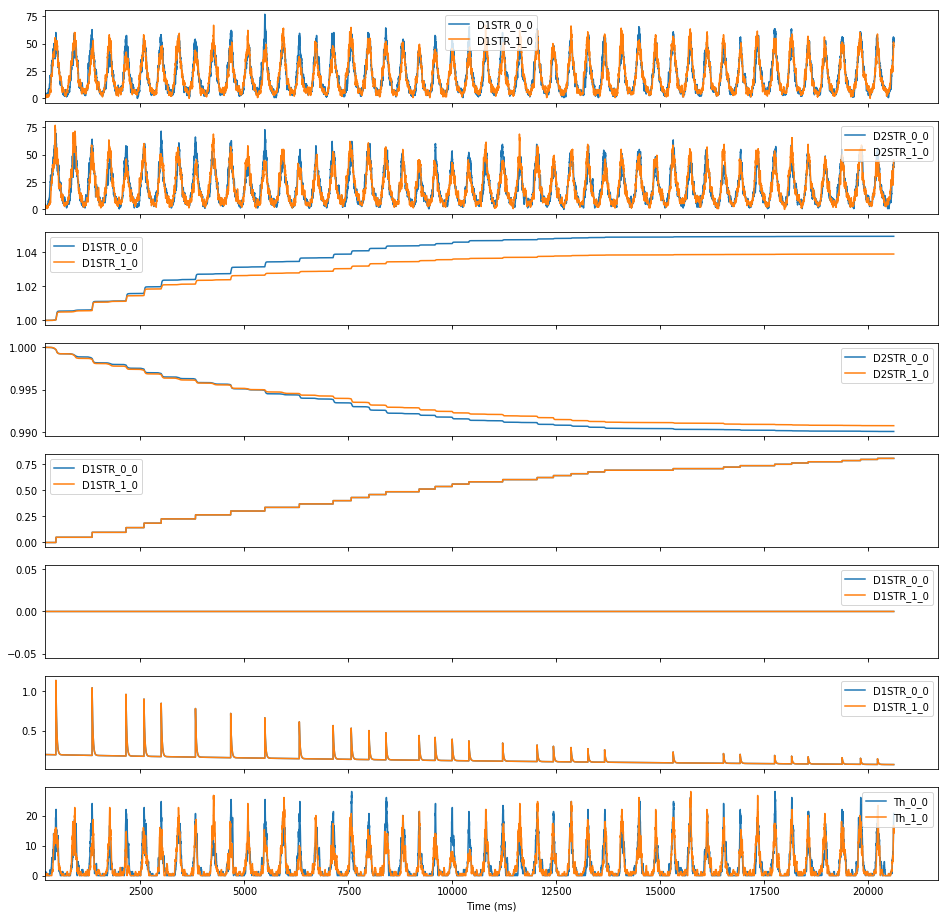

In [1604]:
result = results[0][6]

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize=(16,16), sharex=True)
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax1)
    result['popfreqs'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax2)
    result['popweights'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax3)
    result['popweights'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax4)
    result['popQ1s'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax5)
    result['popQ2s'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax6)
    result['dopamine'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax7)
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax8)

ax1.set_xlim(200, ax.get_xlim()[-1])#(750,900)#
ax2.set_xlim(200, axx.get_xlim()[-1])#(750,900)#


In [1605]:
decisions = []
for sn in range(sweepcount):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs2(result)['decision made'])
decisions

[[[{'delay': 300.0121154785156,
    'pathvals': [0],
    'start': 200,
    'threshold': 20.0,
    'time': 500.01212},
   {'delay': 238.02670288085938,
    'pathvals': [1],
    'start': 200,
    'threshold': 20.0,
    'time': 938.0388},
   {'delay': 246.9171142578125,
    'pathvals': [0],
    'start': 200,
    'threshold': 20.0,
    'time': 1384.9559},
   {'delay': 233.89404296875,
    'pathvals': [0],
    'start': 200,
    'threshold': 20.0,
    'time': 1818.85},
   {'delay': 221.8970947265625,
    'pathvals': [0],
    'start': 200,
    'threshold': 20.0,
    'time': 2240.747},
   {'delay': 207.900390625,
    'pathvals': [0],
    'start': 200,
    'threshold': 20.0,
    'time': 2648.6475},
   {'delay': 204.901123046875,
    'pathvals': [1],
    'start': 200,
    'threshold': 20.0,
    'time': 3053.5486},
   {'delay': 216.898193359375,
    'pathvals': [1],
    'start': 200,
    'threshold': 20.0,
    'time': 3470.4468},
   {'delay': 229.89501953125,
    'pathvals': [0],
    'start': 200

213.775517578125

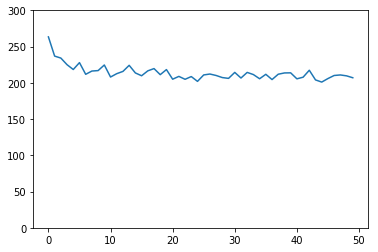

In [1606]:
stagecount = len(decisions[0][0])
reactions = []
for i in range(0, stagecount):
    thesereacts = []
    for j in range(0, len(decisions[0])):
        thesereacts.append(decisions[0][j][i]['delay'])
    reactions.append(thesereacts)
meanreact = [np.mean(i) for i in reactions]
stdreact = [np.std(i) for i in reactions]
upreact = [meanreact[i]+stdreact[i] for i in range(0,len(meanreact))]
lwreact = [meanreact[i]-stdreact[i] for i in range(0,len(meanreact))]
plt.plot(meanreact)
plt.ylim(0,300)
np.mean(meanreact)

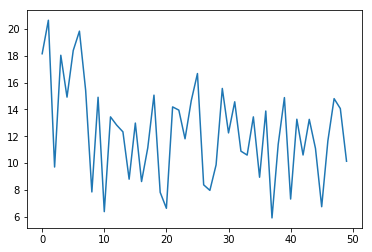

In [1607]:
plt.plot(stdreact)

0.565

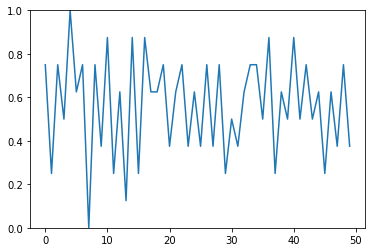

In [1610]:
stagecount = len(decisions[0][0])
reactions = []
for i in range(0, stagecount):
    thesereacts = []
    for j in range(0, len(decisions[0])):
        if len(decisions[0][j][i]['pathvals']) > 0:
            thesereacts.append(1-decisions[0][j][i]['pathvals'][0])
    reactions.append(thesereacts)
meanreact = [np.mean(i) for i in reactions]
stdreact = [np.std(i)/math.sqrt(len(i)) for i in reactions]
upreact = [meanreact[i]+stdreact[i] for i in range(0,len(meanreact))]
lwreact = [meanreact[i]-stdreact[i] for i in range(0,len(meanreact))]
plt.plot(meanreact)
plt.ylim(0,1)
#plt.plot(upreact)
#plt.plot(lwreact)
np.mean(meanreact)

In [1611]:

np.mean(meanreact[:])

0.565

In [1612]:
np.mean(meanreact[10:])

0.5625